In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import glob
import os
import peakutils
import logging
import datetime
import warnings
from lmfit.models import PseudoVoigtModel, GaussianModel
from jupyterthemes import jtplot
from matplotlib.colors import Normalize

In [2]:
from xps.xps_sw import *
from xps.xps_import import *
from xps.xps_analysis import *
from xps.xps_bg import *
from xps.xps_fits import *

jtplot.style('grade3', context='talk', grid=False, ticks=True, fscale=1.5)
logging.getLogger().setLevel(logging.CRITICAL)
warnings.filterwarnings("ignore")

In [4]:
asf = dict({'C1s' : 0.296, 'O1s' : 0.711, 'O1s_sub' : 0.711, 'N1s' : 0.477, 'Ba3d' : 7.49, 'Ba_3d_5/2' : 7.49, 'Ba_3d_3/2' : 5.20,
            'Br_3p' : 1.054, 'Cu_2p' : 5.321, 'Ba_4d': 2.35, 'Na1s' : 1.685, 'Cl_2s' : 0.37, 'Ru3d' : 4.273,
           'In3d' : 4.359, 'Sn3d' : 4.725, 'Cl2p' : 0.891, 'Cl2p_(2)' : 0.891, 'Cl2p_(3)' : 0.891, 'Si2p': 0.339})

asf2 = {'Ba_3d_5/2' : 25.8, 'Ba_3d_3/2': 17.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.69, }

asf3 = {'Ba_3d_5/2' : 64.3, 'Ba_3d_3/2': 49.9, 'Ba_4d': 5.86, 'Cl_2p': 2.28, 'Cl_2s': 1.50}
mfps = {'Cu2p' : 1.86, 'In3d': 3.05, 'Si2p': 3.8}

# Import data

In [60]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_FBIG2/2022_03_07_FBIG2_silatrane_powder'
files = glob.glob(path+'/**/*.sxy')
files.sort()
powders = [read_processed_xp(f) for f in files]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBIG2/2022_03_07_FBIG2_silatrane_powder/proc/20220216_powder_PTES_Ru.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBIG2/2022_03_07_FBIG2_silatrane_powder/proc/20220307_powder_FBIG2_silatrane.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBIG2/2022_03_07_FBIG2_silatrane_powder/proc/20220308_powder_silatrane.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBIG2/2022_03_07_FBIG2_silatrane_powder/proc/20220309_indium_foil.sxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBIG2/2022_03_07_FBIG2_silatrane_powder/proc/20220309_indium_foil_2.sxy.ft', returning empty fit dict


In [61]:
names = ['Ru(bpy)-silatrane', 'G2-silatrane', 'Silatrane', 'In foil', 'In foil (2)']
cols = ['y', 'r', 'g', 'b', 'm']
for c, n, xp in zip (cols, names, powders):
    xp.color = c
    xp.name = n

# Plot regions

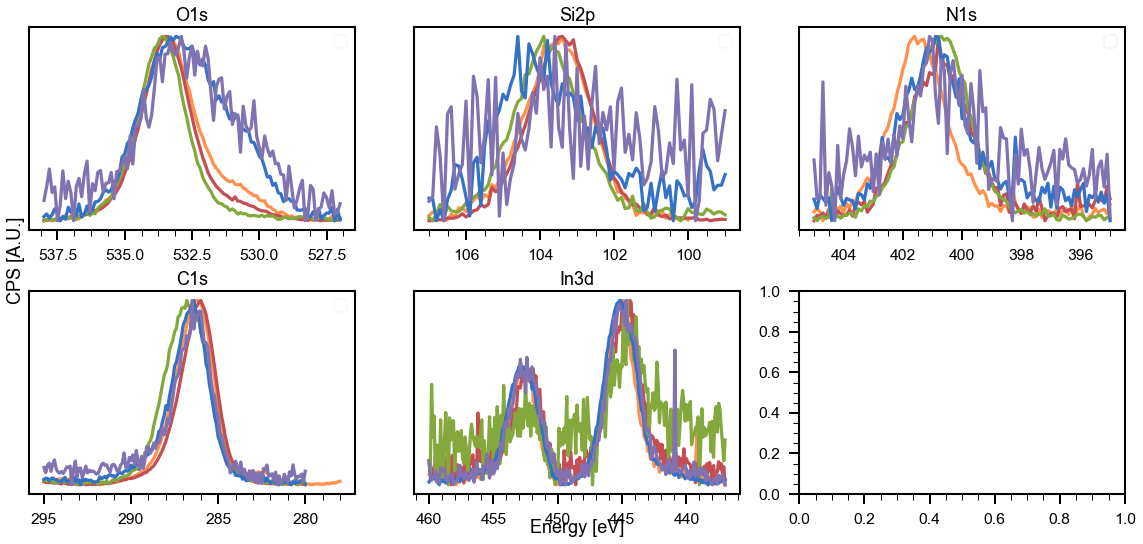

In [54]:
regs = ['O1s', 'Si2p',  'N1s', 'C1s', 'In3d']
ax = plot_normal_regions(powders, regs, ncols=3);
ax[1,1].get_legend().remove()
# ax[0,1].invert_xaxis()

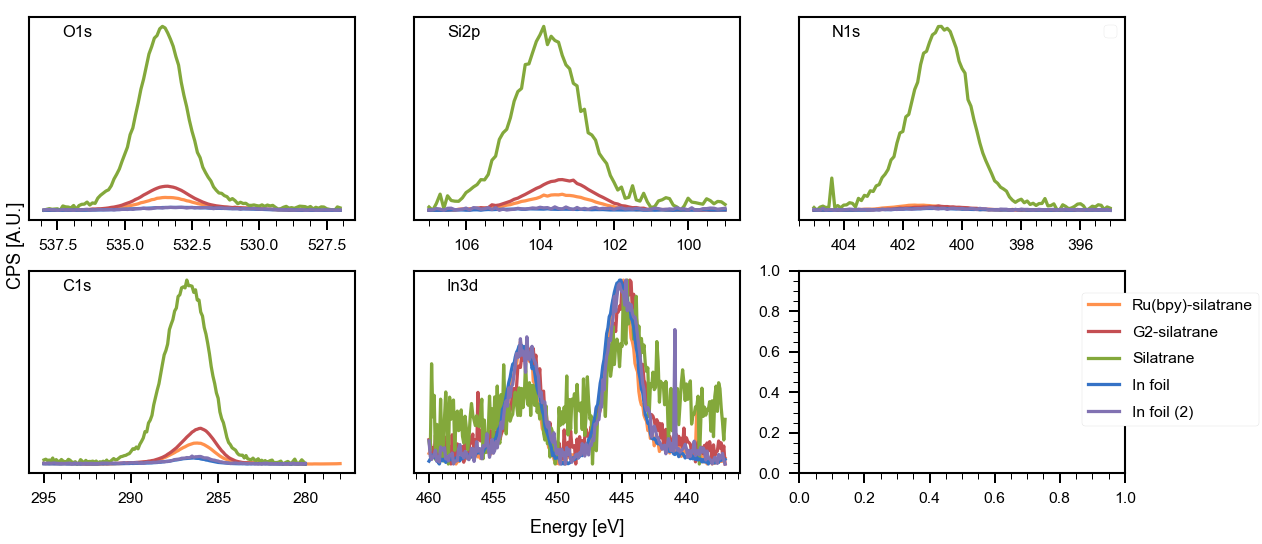

In [31]:
regs = ['O1s', 'Si2p',  'N1s', 'C1s', 'In3d']
ax = plot_xp_regions(powders, regs, ncols=3);
# ax[0,0].invert_xaxis()
# ax[0,1].invert_xaxis()

In [64]:
sel = deepcopy(powders)
sel.pop(2);

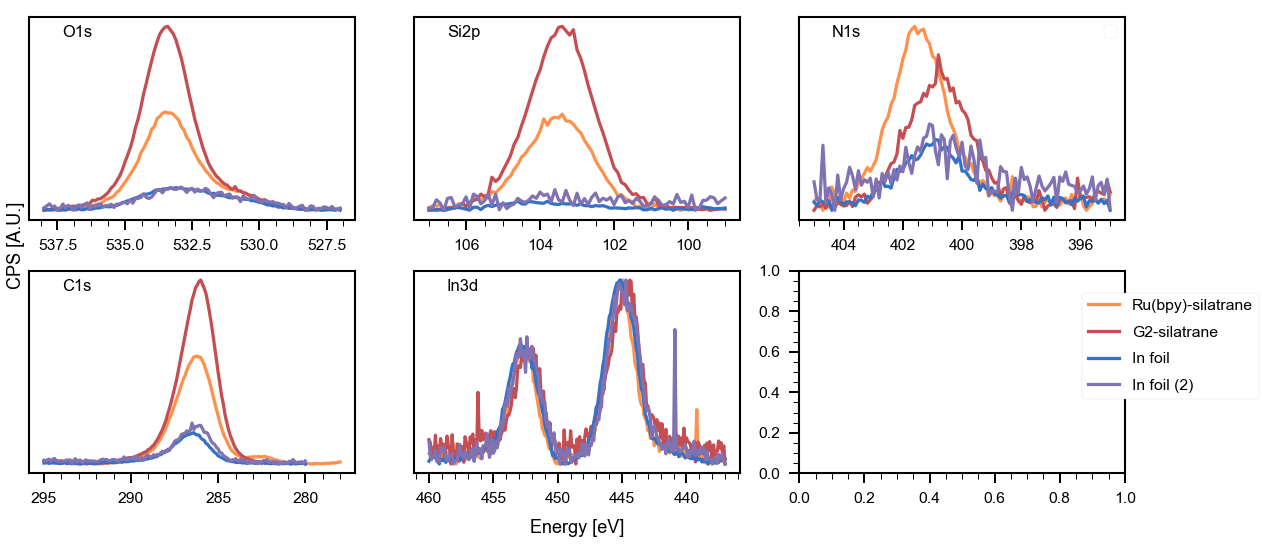

In [65]:
regs = ['O1s', 'Si2p',  'N1s', 'C1s', 'In3d']
ax = plot_xp_regions(sel, regs, ncols=3);
# ax[0,0].invert_xaxis()
# ax[0,1].invert_xaxis()

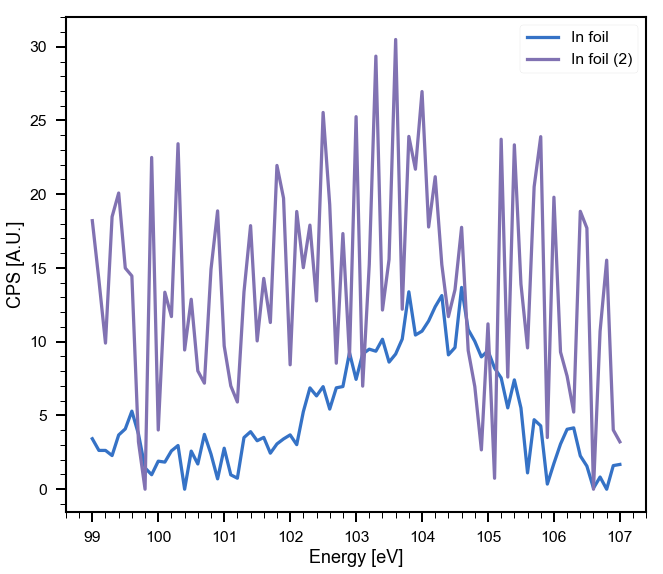

In [67]:
plot_region(powders[3], 'Si2p')
plot_region(powders[4], 'Si2p')

## Scale to C 1s

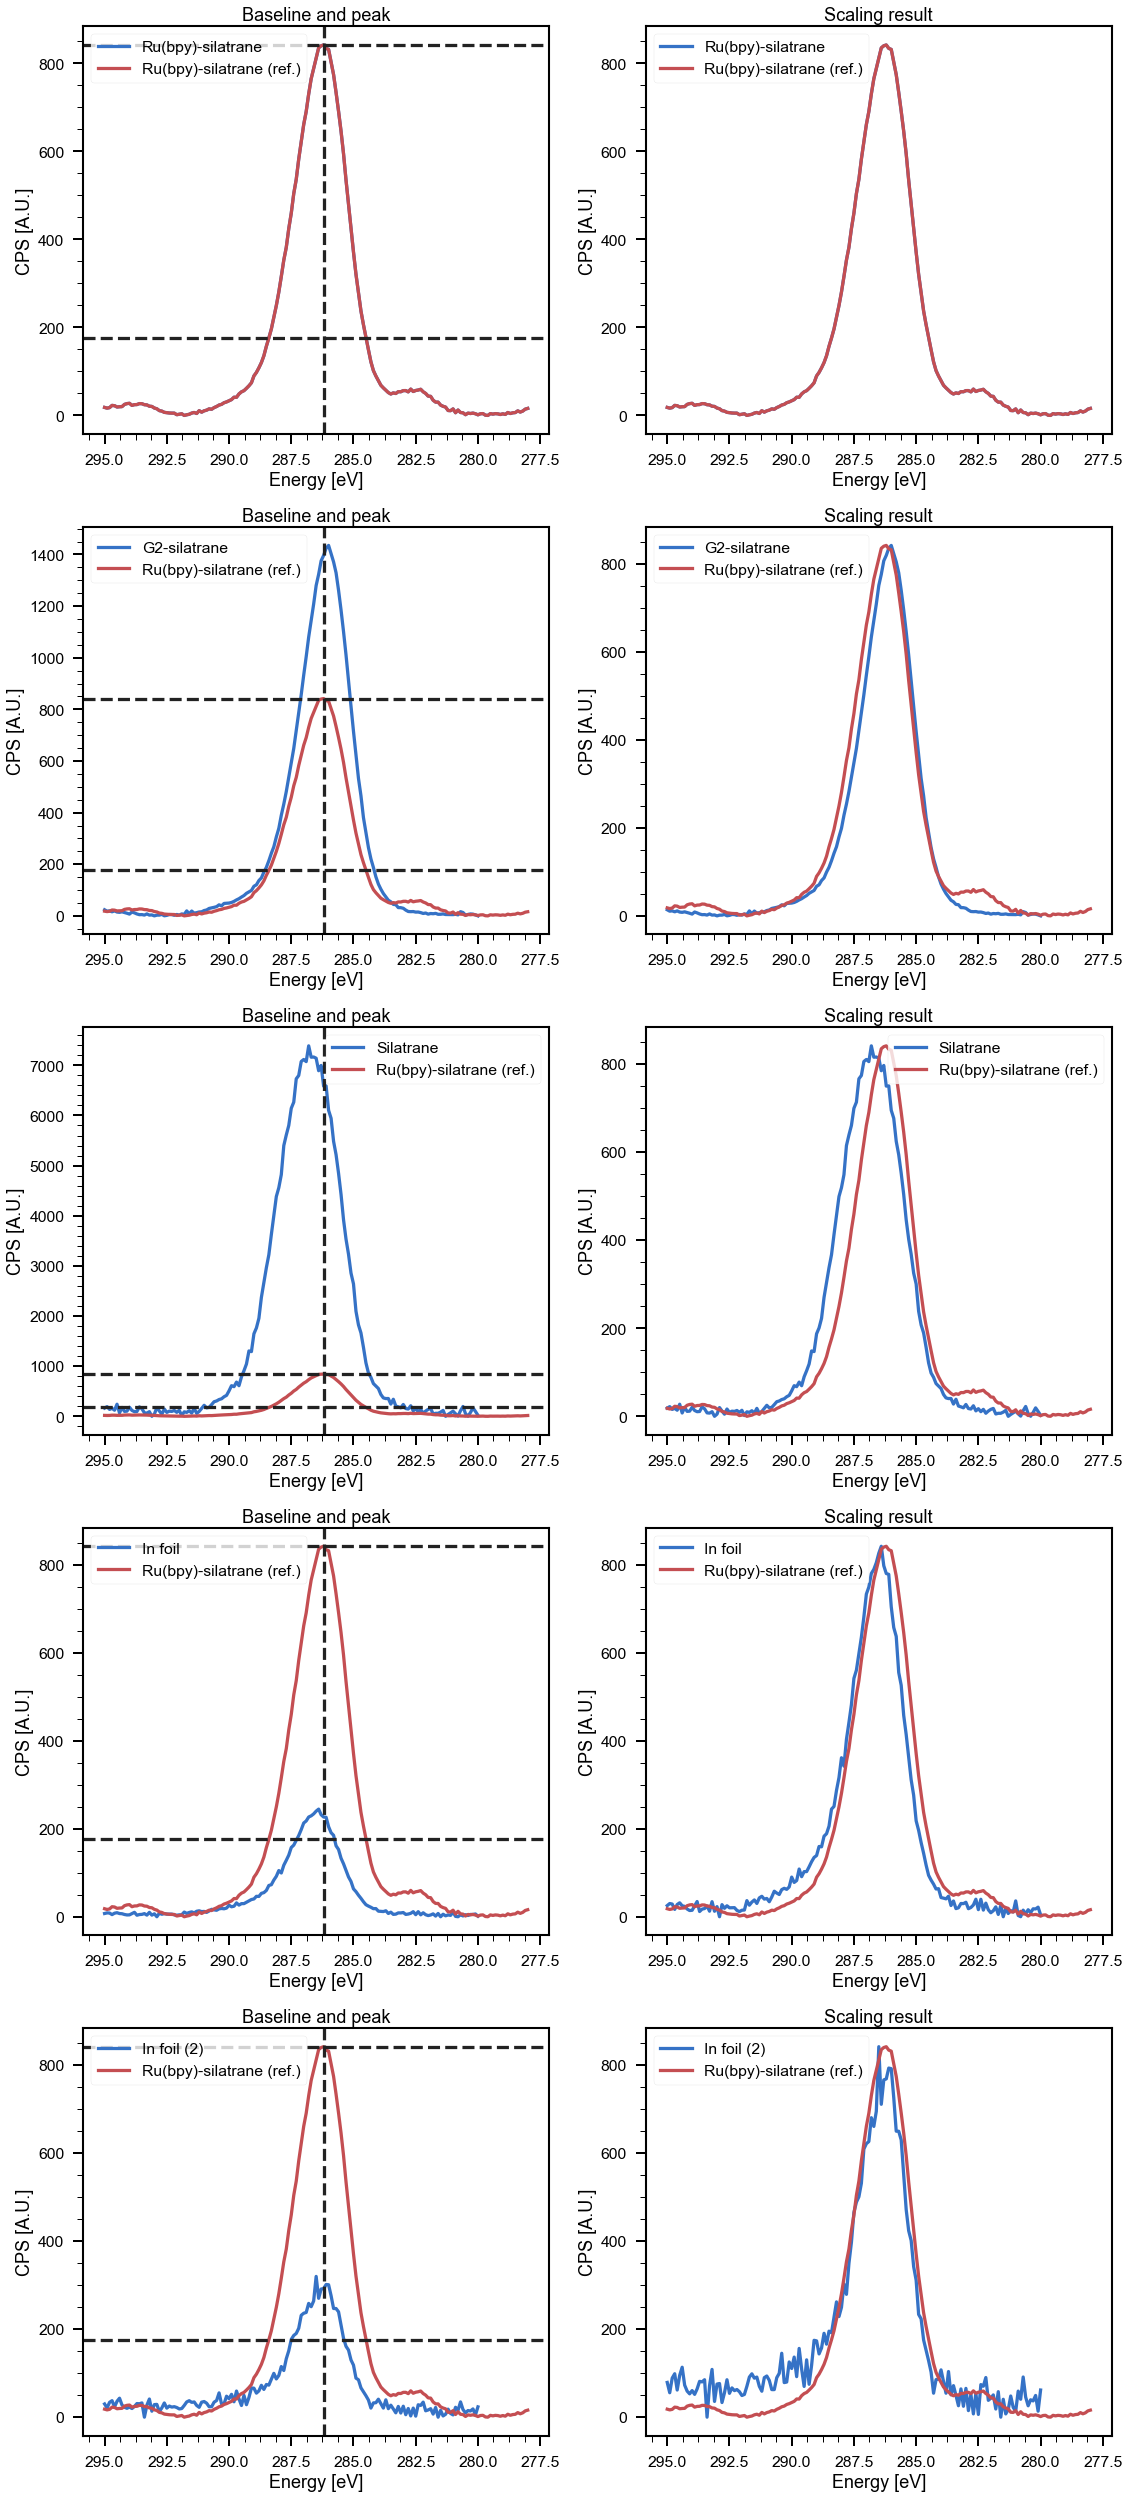

In [68]:
scaled = scale_and_plot_spectra(powders, region='C1s');

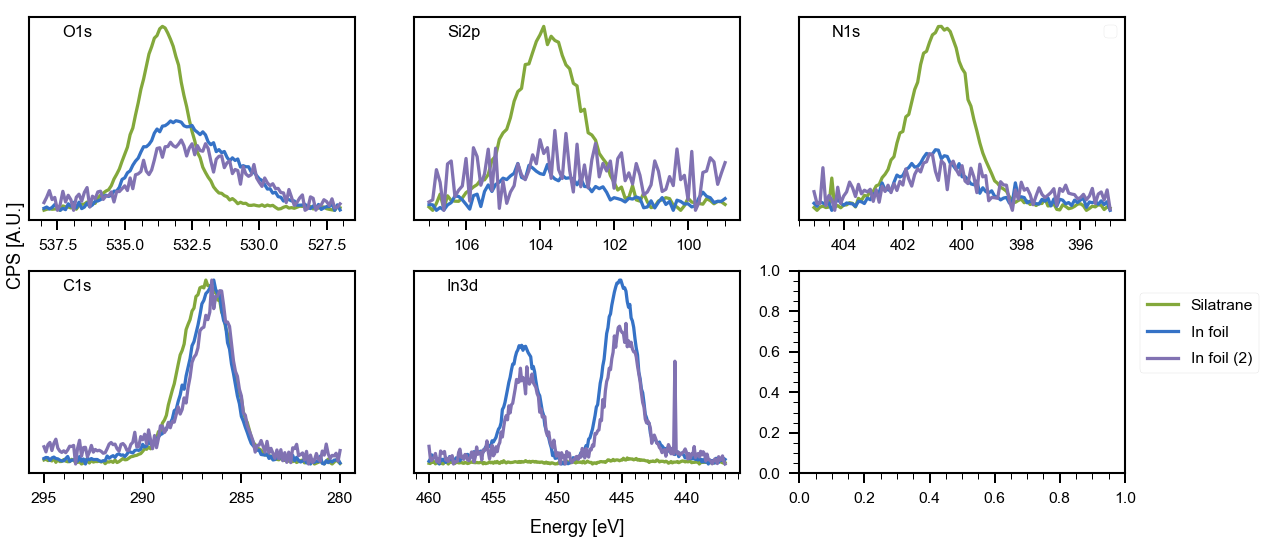

In [70]:
regs = ['O1s', 'Si2p',  'N1s', 'C1s', 'In3d']
ax = plot_xp_regions(scaled[2:], regs, ncols=3);
# ax[0,0].invert_xaxis()
# ax[0,1].invert_xaxis()

# Stoichiometry

In [41]:
path = '/Users/pabloherrero/sabat/xps_spectra/ITO_FBIG2/2022_03_07_FBIG2_silatrane_powder'
files = glob.glob(path+'/**/*.uxy')
files.sort()
powders = [read_processed_xp(f) for f in files]

[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBIG2/2022_03_07_FBIG2_silatrane_powder/proc/20220216_powder_PTES_Ru.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBIG2/2022_03_07_FBIG2_silatrane_powder/proc/20220307_powder_FBIG2_silatrane.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBIG2/2022_03_07_FBIG2_silatrane_powder/proc/20220308_powder_silatrane.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBIG2/2022_03_07_FBIG2_silatrane_powder/proc/20220309_indium_foil.uxy.ft', returning empty fit dict
[Errno 2] No such file or directory: '/Users/pabloherrero/sabat/xps_spectra/ITO_FBIG2/2022_03_07_FBIG2_silatrane_powder/proc/20220309_indium_foil_2.uxy.ft', returning empty fit dict


In [42]:
names = ['Ru(bpy)-silatrane', 'G2-silatrane', 'Silatrane', 'In foil', 'In foil (2)']
cols = ['y', 'r', 'g', 'b', 'm']
for c, n, xp in zip (cols, names, powders):
    xp.color = c
    xp.name = n

In [43]:
num = ['C1s', 'O1s', 'O1s', 'C1s', 'C1s', 'N1s']
denom = ['O1s', 'N1s', 'Si2p','N1s', 'Si2p', 'Si2p',]
display_stoichiometry( powders , num, denom)

In [44]:
num = ['C1s', 'O1s', 'O1s', 'C1s', 'C1s', 'N1s']
denom = ['O1s', 'N1s', 'Si2p','N1s', 'Si2p', 'Si2p',]
make_stoichometry_table( powders , num, denom)

Experiment	C/O	O/N	O/Si	C/N	C/Si	N/Si	
Ru(bpy)-silatrane	2.65 	 5.99 	 3.25 	 15.89 	 8.62 	 0.54 	 
G2-silatrane	2.45 	 12.16 	 2.92 	 29.84 	 7.17 	 0.24 	 
Silatrane	2.15 	 2.01 	 3.30 	 4.33 	 7.12 	 1.64 	 
In foil	2.23 	 4.27 	 8.76 	 9.51 	 19.50 	 2.05 	 
In foil (2)	2.76 	 3.25 	 3.75 	 8.97 	 10.34 	 1.15 	 


In [72]:
rusila = {'C1s': 30+2+2*(3+6), 'O1s':2+2*3, 'N1s':6+2*2, 'Si2p': 2, 'Ru3d': 1}
rusil = XPS_experiment(name='Stoichiometry Ru-silatrane', area=rusila)

g2silat_a = {'C1s': 31 + 7, 'O1s':5+4, 'N1s':3+2, 'Si2p': 1, 'Si2s': 1}
g2silat = XPS_experiment(name='Sto. G2-silatrane', area=g2silat_a)

silat_a = {'C1s': 7, 'O1s':4, 'N1s':2, 'Si2p': 1, 'Si2s': 1}
silat = XPS_experiment(name='Sto. silatrane', area=silat_a)

In [73]:
display_stoichiometry( [rusil, g2silat, silat] , num, denom)